In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class LinearRegression:
  def __init__(self):
      self.line_eqn = [] #hold the diff values of thetas.

  def fit(self,X,y,alpha,epochs,**kwargs):
      """
      Take in numpy array X, y and theta and update theta by taking   epochs gradient steps
      with learning rate of alpha
      
      return theta, y-intercept and list of the cost of theta during each  iteration
      """
      
      m=len(y)
      J_history=[]
      self.theta = np.zeros((X.shape[1],1)) 
      self.b = 0
      y = y.reshape(-1,1)

      for i in range(epochs):
          # print(self.theta)
          self.line_eqn.append([np.copy(self.theta),self.b])
          predictions = X.dot(self.theta) + self.b
          error = np.dot(X.transpose(),(predictions -y))
          descent=alpha * 1/m * error
          self.theta-=descent
          self.b = self.b - alpha * 1/m * np.sum(predictions -y)
          J_history.append(self.computeCost(X,y,self.theta,self.b))

      return self.theta, self.b, J_history

  def computeCost(self,X,y,w,b):
      """
      Take in a numpy array X,y, w,b and generate the cost function of using theta(w) as parameter in a linear regression model
      """
      m=len(y)
      predictions=X.dot(w) + b  #y = w.x+b
      square_err=(predictions - y)**2   #f(x(i))-y(i)
      cost = 1/(2*m) * np.sum(square_err)
      return cost

  @property
  def line(self):
      """
      Returns the calculated parameters of the model 
      """
      return self.theta, self.b

  def predict(self,x):
      """
      x - input features
      """
      prediction = x.dot(self.theta) + self.b
      return prediction

  def visualise(self,X,y,test_x):
      """
      X - Train input Data for Scatter Plot
      y - Train output Data for Scatter Plot
      test_x - Data for testing and plotting
      """
      try:
        plt.scatter(X, y, label="Actual Value");
        plt.plot(X, self.predict(test_x), label="Predicted Value",c="r"); 
        plt.xlabel("x"); 
        plt.ylabel("y"); 
        plt.legend(); 
        plt.show()
      except Exception as err:
        print(err)
        print("Visualision works with univariable dataset")

In [11]:
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

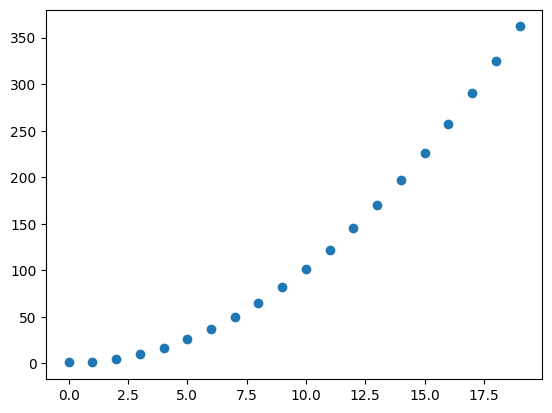

In [12]:
plt.scatter(X,y)

In [13]:
lr = LinearRegression()

In [14]:
x = x.reshape(-1,1)

In [15]:
X = X.reshape(-1,1)

In [16]:
y = y.reshape(-1,1)

In [17]:
theta,b,loss = lr.fit(x,y,1e-2,1000)

In [18]:
theta,b

(array([[18.69806954]]), -52.08341025448668)

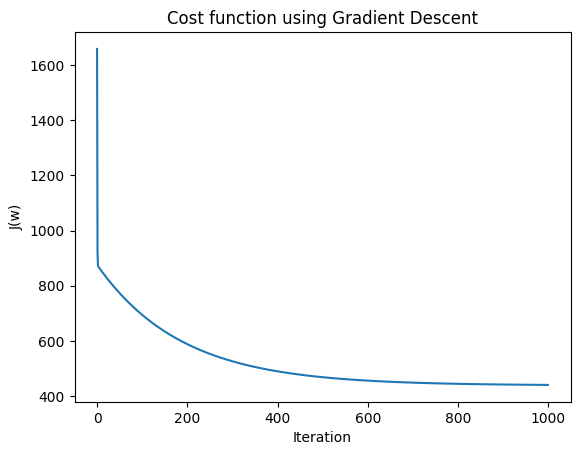

In [19]:
plt.plot(loss)
plt.xlabel("Iteration")
plt.ylabel("J(w)")
plt.title("Cost function using Gradient Descent")
plt.show()

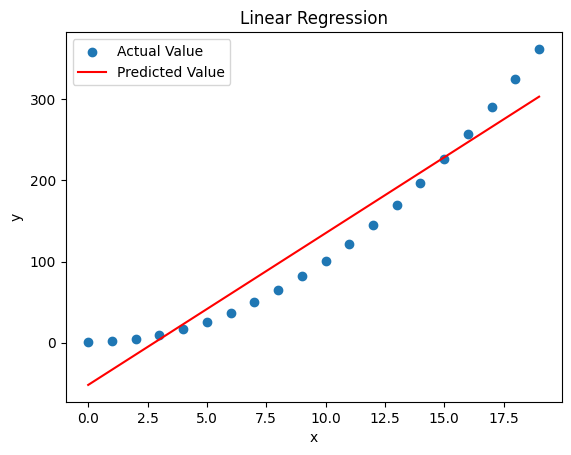

In [20]:
plt.title("Linear Regression")
lr.visualise(x,y,x)

In [21]:
# create target data
x1 = np.arange(0, 20, 1)
y1 = 1 + x1**2

# Engineer features 
X = x1**2      

print(x1)
print(y1)
print(X)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]
[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]


In [22]:
model = LinearRegression()

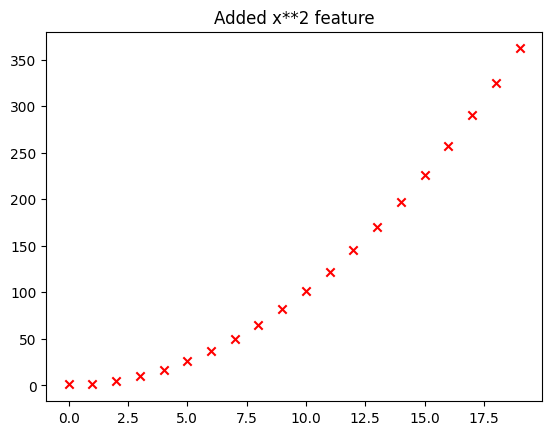

In [23]:
plt.scatter(x1, y1, marker='x', c='r', label="Actual Value"); 
plt.title("Added x**2 feature")
plt.show()

In [24]:
X = X.reshape(-1,1)

In [25]:
param_w,param_b,hist = model.fit(X,y1,1e-5,1000)

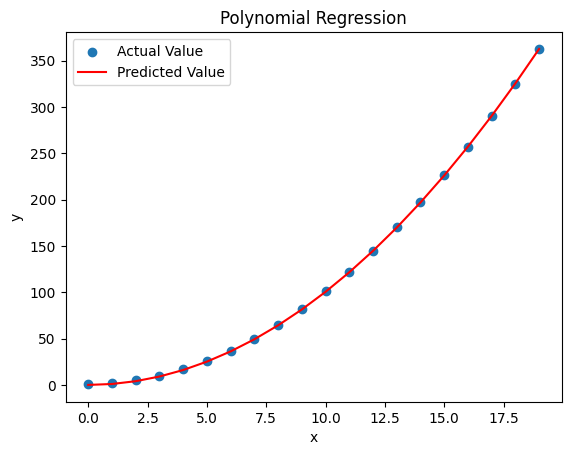

1.0044x² + 0.008956967008735975


In [26]:
plt.title("Polynomial Regression")
model.visualise(x1,y1,X)
print(str(round(model.line[0][0][0],4)) + "x² + " + str(model.line[1]))

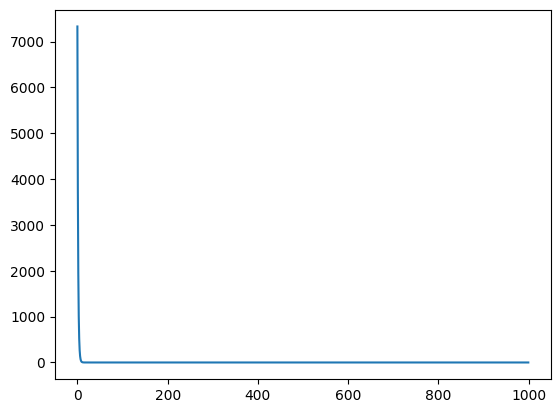

In [27]:
plt.plot(hist)

In [28]:
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x,x**2, x**3]   

In [29]:
lr = LinearRegression()

In [30]:
model_w,model_b,history = lr.fit(X, y, alpha=1e-7, epochs=10000)

In [31]:
import matplotlib.pyplot as plt

In [32]:
fn = f"f(x) = {round(lr.line[0][0][0],4)}x + {round(lr.line[0][1][0],4)}x\u00B2 + {round(lr.line[0][2][0],4)}x\u00B3 + {round(lr.line[1],4)}"
print(fn)
print("The gradient descent algorithm identifies the feature scaled as x\u00B2 and reduced the weights of other parameters")

f(x) = 0.0824x + 0.5355x² + 0.0275x³ + 0.0106
The gradient descent algorithm identifies the feature scaled as x² and reduced the weights of other parameters


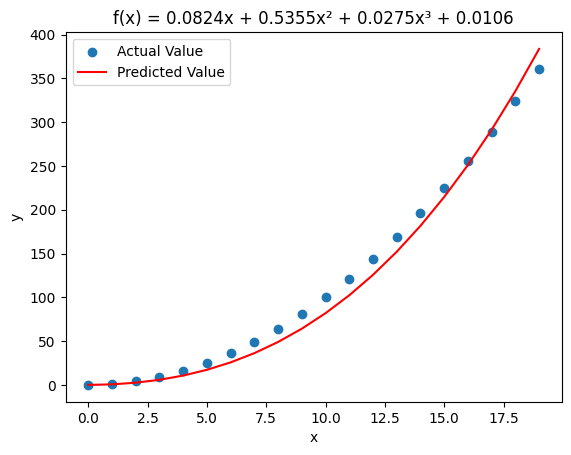

In [33]:
plt.title(fn)
lr.visualise(x,y,X)

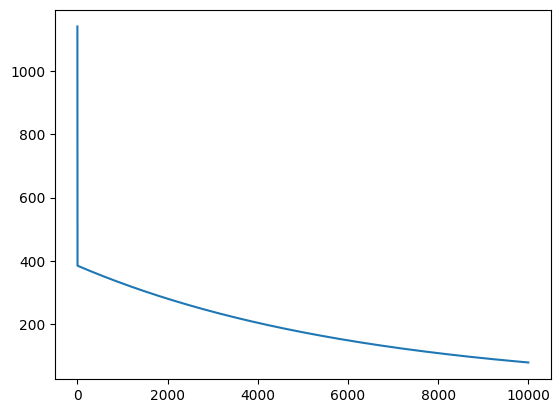

In [34]:
plt.plot(history)

## An Alternate View

In [35]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x\u00B2','x\u00B3']

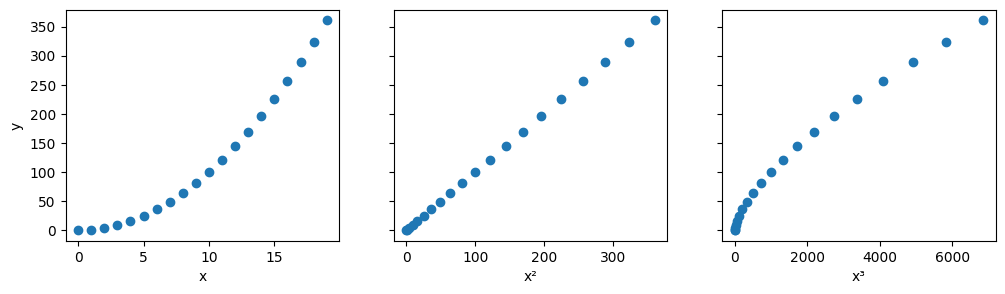

In [36]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

In [37]:
def zscore_normalize_features(data):
  mean = np.mean(data,axis=0)
  std = np.std(data,axis=0)

  # Calculate the Z-scores
  z_scores = (data - mean) / std
  return z_scores

In [38]:
# create target data
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# add mean_normalization 
X = zscore_normalize_features(X)     
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.29501788 3.18076489 3.28307153]


In [39]:
polynomial_regression = LinearRegression()

In [40]:
w,b,hist = polynomial_regression.fit(X,y,epochs=10000,alpha=1e-1)

In [41]:
new_fn = f"f(x) = {round(polynomial_regression.line[0][0][0],4)}x + {round(polynomial_regression.line[0][1][0],4)}x\u00B2 + {round(polynomial_regression.line[0][2][0],4)}x\u00B3 + {round(polynomial_regression.line[1],4)}"
print(new_fn)
print("This model also identifies the right parameter as w2 and reduces the weight for the other parameters")

f(x) = 7.6745x + 93.9463x² + 12.2887x³ + 123.5
This model also identifiers the right parameter as w2 and reduces the weight for the other parameters


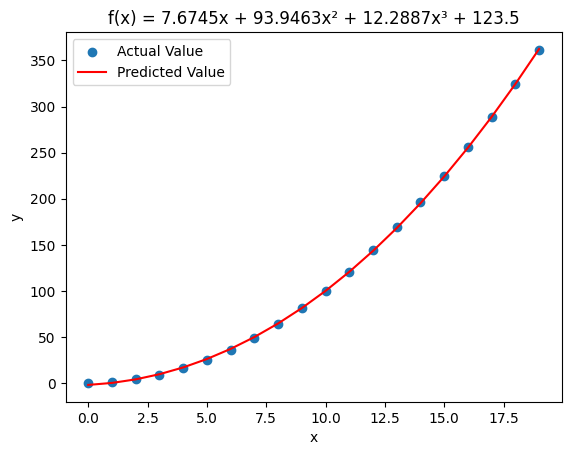

In [42]:
plt.title(new_fn)
polynomial_regression.visualise(x,y,X)